# Overfitting and Underfitting

## Exercise 1 : Load dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=1000)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [ ]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((25000,), (25000,)), ((25000,), (25000,)))

We have 25,000 training values and 25,000 testing values. In total, we have 50,000 rows in our dataset

## Exercise 2 : Preparing the data

In [ ]:
import numpy as np

In [ ]:
def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [ ]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((25000, 10000), (25000,)), ((25000, 10000), (25000,)))

Our training set and testing set have 25,000 rows and 10,000 columns.

## Exercise 3 : Reducing the network size

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
original_model = Sequential()
original_model.add(Dense(16, activation='relu'))
original_model.add(Dense(16, activation='relu'))
original_model.add(Dense(1, activation='sigmoid'))
original_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Exercise 4 : Smaller model

In [ ]:
smaller_model = Sequential()
smaller_model.add(Dense(4, activation='relu'))
smaller_model.add(Dense(4, activation='relu'))
smaller_model.add(Dense(1, activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Exercise 5 : Fit the original model

In [ ]:
original_hist = original_model.fit(
    x_train, 
    y_train, 
    batch_size = 512, 
    epochs = 20, 
    validation_data = (x_test, y_test)
)

Epoch 1/20
49/49 [==============================] - 4s 69ms/step - loss: 0.5928 - acc: 0.7134 - val_loss: 0.3979 - val_acc: 0.8488
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3682 - acc: 0.8583 - val_loss: 0.3409 - val_acc: 0.8610
Epoch 3/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3299 - acc: 0.8656 - val_loss: 0.3279 - val_acc: 0.8625
Epoch 4/20
49/49 [==============================] - 1s 31ms/step - loss: 0.3151 - acc: 0.8686 - val_loss: 0.3252 - val_acc: 0.8620
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3056 - acc: 0.8733 - val_loss: 0.3257 - val_acc: 0.8618
Epoch 6/20
49/49 [==============================] - 2s 31ms/step - loss: 0.3047 - acc: 0.8741 - val_loss: 0.3262 - val_acc: 0.8608
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3065 - acc: 0.8734 - val_loss: 0.3711 - val_acc: 0.8421
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2992 - a

## Exercise 6 : Fit the smaller model

In [ ]:
smaller_hist = smaller_model.fit(
    x_train, 
    y_train, 
    batch_size = 512, 
    epochs = 20, 
    validation_data = (x_test, y_test)
)

NameError: name 'smaller_model' is not defined

KernelInterrupted: Execution interrupted by the Jupyter kernel.

## Exercise 7 : Get val_loss

In [ ]:
original_loss = original_hist.history['val_loss']
small_loss = smaller_hist.history['val_loss']

## Exercise 8 : Plot the validation loss

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_hist(y, original, labels, n_epoch=20, figsize=(12, 8)):
    x_range = np.arange(1, n_epoch + 1, 1, "int16")
    
    plt.figure(figsize=(12, 8))
    plt.plot(x_range, original, linestyle='dashed', marker='p', label=labels[1])
    plt.plot(x_range, y, linestyle='dashed', marker='o', label=labels[0])
    plt.xlabel('epochs')
    plt.ylabel('validation loss')
    plt.xticks(x_range)
    plt.legend()
    plt.grid(b=True, which='major', color='#bdc3c7', linestyle='-')
    plt.show()

In [ ]:
plot_hist(small_loss, original_loss, labels= ['Smaller Model', 'Original Model'])

NameError: name 'small_loss' is not defined

## Exercise 9: Bigger model

In [ ]:
bigger_model = Sequential()
bigger_model.add(Dense(512, activation='relu'))
bigger_model.add(Dense(512, activation='relu'))
bigger_model.add(Dense(1, activation='sigmoid'))
bigger_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Exercise 10: Fit the bigger model

In [ ]:
bigger_hist = bigger_model.fit(
    x_train, 
    y_train, 
    batch_size = 512, 
    epochs = 20, 
    validation_data = (x_test, y_test)
)

## Exercise 11: Plot the bigger and original validation loss

In [ ]:
big_loss = bigger_hist.history['val_loss']

In [ ]:
plot_hist(big_loss, original_loss, labels= ['Bigger Model', 'Original Model'])

*Note:
The more capacity the network has, the quicker it
will be able to model the training data, but if it converges quickly to 0, this is
more susceptible for overfitting!* 

## Exercise 12: Weight regularization

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
l2_model = Sequential()
l2_model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_model.add(Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Exercise 13: Fit L2 model

In [ ]:
l2_model_hist = l2_model.fit(
    x_train, 
    y_train, 
    batch_size = 512, 
    epochs = 20, 
    validation_data = (x_test, y_test)
)

Epoch 1/20
49/49 [==============================] - 4s 83ms/step - loss: 0.5405 - acc: 0.7827 - val_loss: 0.4415 - val_acc: 0.8305
Epoch 2/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3889 - acc: 0.8549 - val_loss: 0.3680 - val_acc: 0.8588
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3546 - acc: 0.8641 - val_loss: 0.3722 - val_acc: 0.8524
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3431 - acc: 0.8680 - val_loss: 0.3499 - val_acc: 0.8620
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3369 - acc: 0.8694 - val_loss: 0.3504 - val_acc: 0.8612
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3349 - acc: 0.8703 - val_loss: 0.3509 - val_acc: 0.8611
Epoch 7/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3323 - acc: 0.8722 - val_loss: 0.3481 - val_acc: 0.8615
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3325 - a

## Exercise 14: Plot L2 and Original model

In [ ]:
l2_loss = l2_model_hist.history['val_loss']

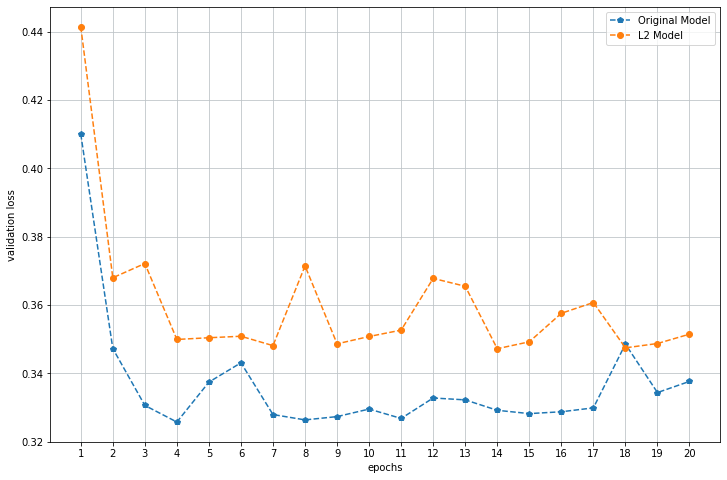

In [ ]:
plot_hist(l2_loss, original_loss, labels= ['L2 Model', 'Original Model'])

## Exercise 15: Adding Dropout

In [ ]:
dpt_model = Sequential()

dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(16, activation='relu'))

dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(16, activation='relu'))

dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Exercise 16: Fit DropOut Model

In [ ]:
dpt_hist = dpt_model.fit(
    x_train, 
    y_train, 
    batch_size = 512, 
    epochs = 20, 
    validation_data = (x_test, y_test)
)

Epoch 1/20
49/49 [==============================] - 12s 239ms/step - loss: 0.6596 - acc: 0.6046 - val_loss: 0.5763 - val_acc: 0.8064
Epoch 2/20
49/49 [==============================] - 5s 112ms/step - loss: 0.5842 - acc: 0.7053 - val_loss: 0.4744 - val_acc: 0.8438
Epoch 3/20
49/49 [==============================] - 6s 112ms/step - loss: 0.5304 - acc: 0.7551 - val_loss: 0.4281 - val_acc: 0.8415
Epoch 4/20
49/49 [==============================] - 5s 110ms/step - loss: 0.5070 - acc: 0.7697 - val_loss: 0.4064 - val_acc: 0.8408
Epoch 5/20
49/49 [==============================] - 5s 109ms/step - loss: 0.4908 - acc: 0.7822 - val_loss: 0.3838 - val_acc: 0.8572
Epoch 6/20
49/49 [==============================] - 5s 111ms/step - loss: 0.4791 - acc: 0.7863 - val_loss: 0.3691 - val_acc: 0.8588
Epoch 7/20
49/49 [==============================] - 6s 119ms/step - loss: 0.4757 - acc: 0.7891 - val_loss: 0.3696 - val_acc: 0.8556
Epoch 8/20
49/49 [==============================] - 5s 109ms/step - loss: 0

## Exercise 17: Plot Drop out and Original

In [ ]:
dpt_loss = dpt_hist.history['val_loss']

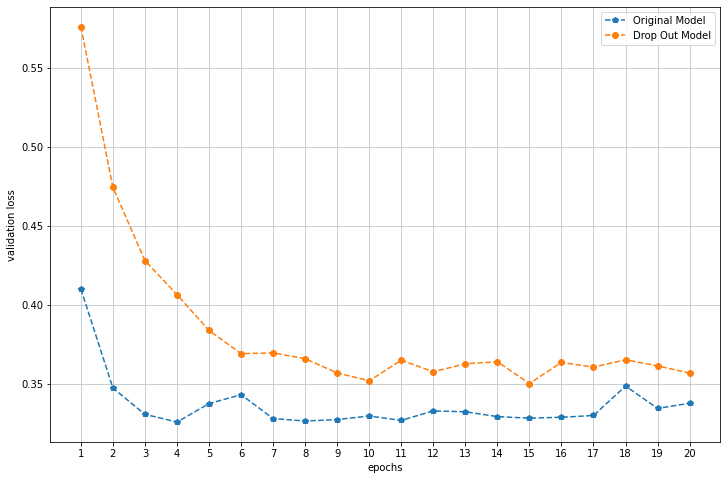

In [ ]:
plot_hist(dpt_loss, original_loss, labels= ['Drop Out Model', 'Original Model'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62eda4a8-d26a-4a56-8c6c-5473bb99037f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>